# Sentiment Analysis on Movie Reviews

In the context of sentiment analysis on movie reviews, this dataset provides a comprehensive collection of features that can be leveraged to understand and predict audience sentiment based on various attributes of movies. Here’s how each column can contribute to sentiment analysis:
## Overview of Dataset Columns
- Poster_Link: URL link to the movie's poster image.
- Series_Title: Title of the movie or series.
- Released_Year: The year the movie was released.
- Certificate: Certification rating of the movie (e.g., PG, R).
- Runtime: Duration of the movie, typically in minutes.
- Genre: Genre(s) of the movie (e.g., Drama, Action).
- IMDB_Rating: IMDb rating of the movie, usually on a scale from 1 to 10.
- Overview: A brief summary or description of the movie's plot.
- Meta_score: The Metascore from Metacritic, which aggregates critic reviews.
- Director: The name of the movie's director.
- Star1: The lead actor or actress in the movie.
- Star2: The second lead actor or actress in the movie.
- Star3: The third lead actor or actress in the movie.
- Star4: The fourth lead actor or actress in the movie.
- No_of_Votes: The number of votes the movie has received on IMDb.
- Gross: The box office gross revenue of the movie.
- Cluster: An additional column that could be used for clustering similar movies together based on certain features.


## Import relevant Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

##  Load Data 

In [2]:
raw_data = pd.read_csv("D:\\Data_Science_Project\\Project_6\\imdb_top_1000.csv")

In [3]:
raw_data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [4]:
df= raw_data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


## Data Cleaning and Preprocessing 

In [7]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
df['Certificate'].fillna(df['Certificate'].mode()[0],inplace = True)

In [9]:
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [10]:
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [11]:
df['Gross']=df['Gross'].str.replace(',',"")

In [12]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [13]:
df['Gross'].fillna(df['Gross'].mean(),inplace= True)

In [14]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [15]:
#sns.pairplot(df)


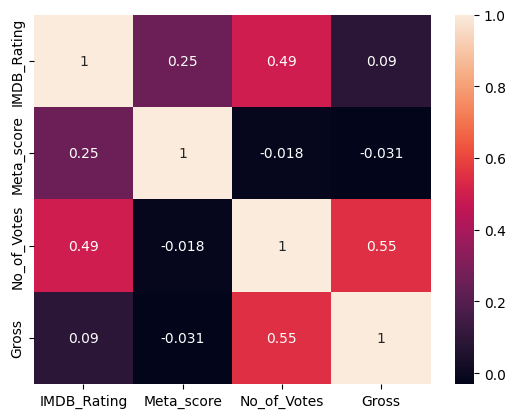

In [16]:
cols =['IMDB_Rating','Meta_score','No_of_Votes','Gross']
corr = df[cols].corr()
sns.heatmap(corr, annot=True)
plt.show()


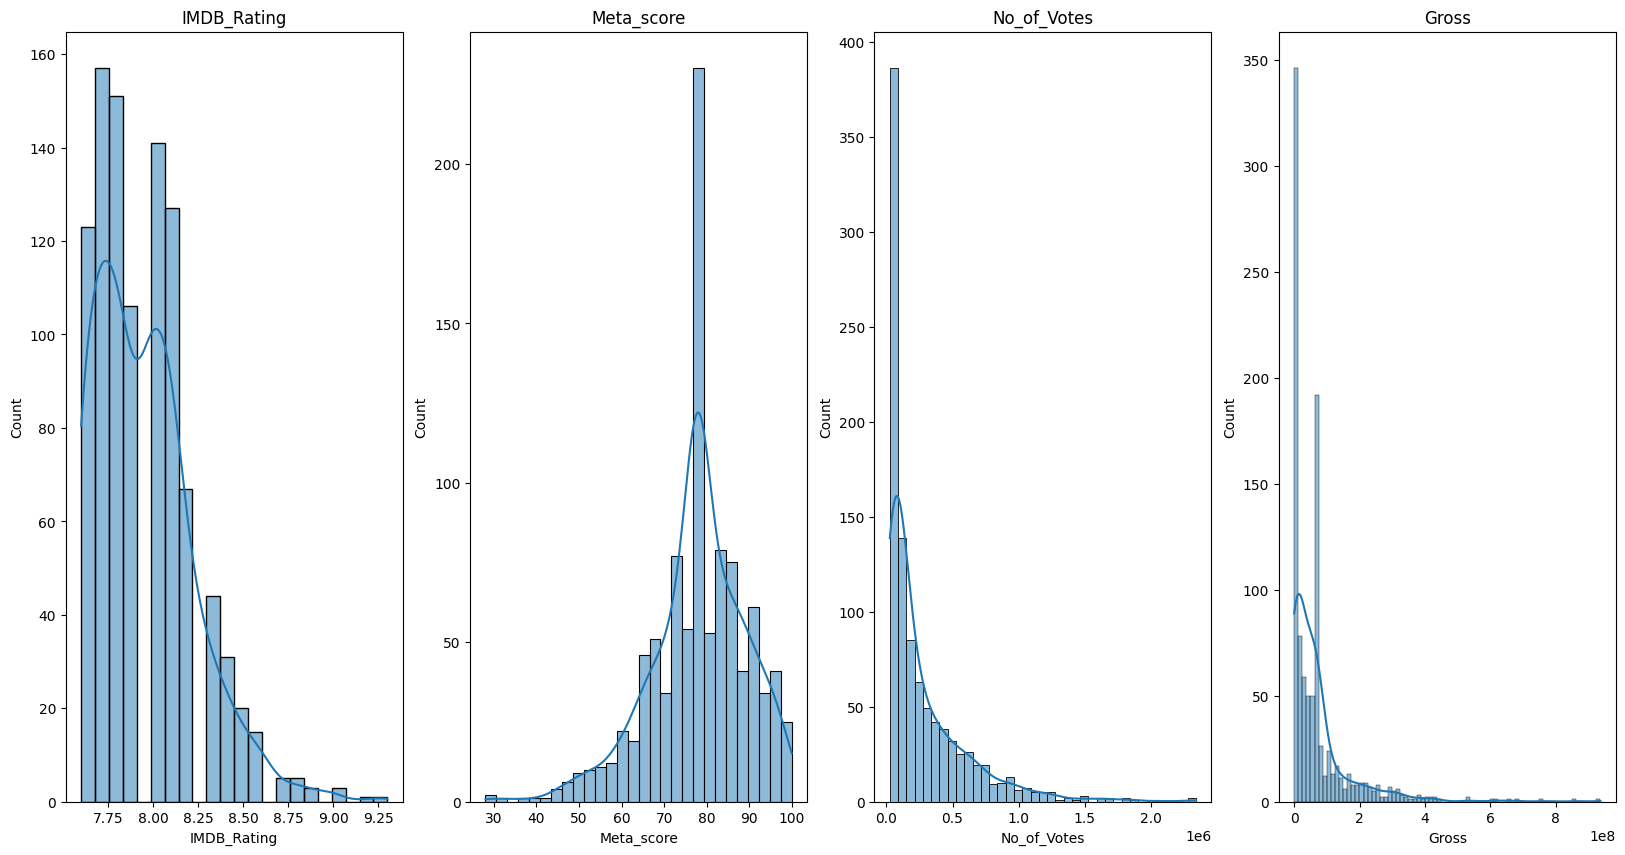

In [17]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df[['IMDB_Rating','Meta_score','No_of_Votes','Gross']]):
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Show the plot
plt.show()


In [18]:
df['IMDB_Rating'] = np.log1p(df['IMDB_Rating'])

In [19]:
df['Gross']=  np.log1p(df['Gross'])

In [20]:
df['No_of_Votes'] = np.log1p(df['No_of_Votes'])

In [21]:
df['Meta_score'] = np.log1p(df['Meta_score'])

In [22]:
df["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

In [23]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,2.332144,Two imprisoned men bond over a number of years...,4.394449,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,14.666990,17.159837
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",2.322388,An organized crime dynasty's aging patriarch t...,4.615121,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,14.298164,18.720537
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",2.302585,When the menace known as the Joker wreaks havo...,4.442651,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,14.649824,20.097513
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",2.302585,The early life and career of Vito Corleone in ...,4.510860,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,13.937687,17.863811
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",2.302585,A jury holdout attempts to prevent a miscarria...,4.574711,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,13.444224,15.287983


# Feature Scaling 

In [24]:
X = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes']]
Y = df['Gross']

## Split training and testing Data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Model_1:LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
prediction1 = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction1)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3.491224272083223


## Model_2:RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)
mse = mean_squared_error(Y_test, prediction2)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3.6601532834202124


## Model_3:GradientBoostingRegressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
prediction3 = model.predict(X_test)
mse = mean_squared_error(Y_test, prediction3)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.3001631101228175


## Training a model using Unsupervised Learning Algorithms (K-Means)

## Elbow method to find optimal no of clusters

In [32]:
from sklearn.cluster import KMeans
Wcss = []
for i in range(1,10):
    Kmeans = KMeans(i)
    Kmeans.fit(X)
    Wcss.append(Kmeans.inertia_)
Wcss

C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1440: Us

[6467.497677849764,
 2644.513991932377,
 1796.6289404460817,
 1188.9458157632018,
 923.5039457954634,
 742.2398446338889,
 646.3112927804223,
 574.483598703571,
 508.7494938665612]

Text(0, 0.5, 'Wcss Values')

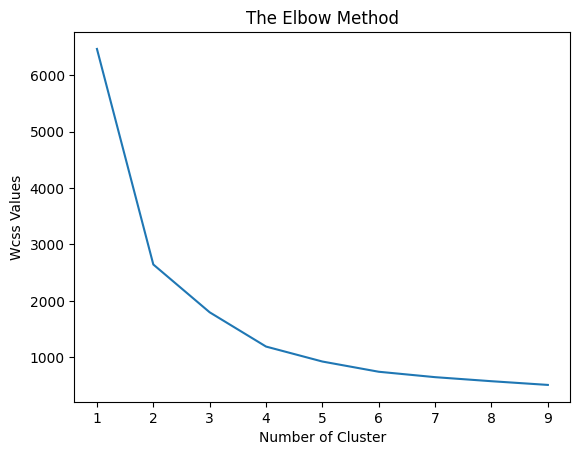

In [33]:
x= range(1,10)
plt.plot(x,Wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("Wcss Values")

In [61]:
kmeans_model = KMeans(3)
kmeans_model.fit(X)

C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [69]:
df['cluster'] =kmeans_model.predict(X)
df['cluster'].unique

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
995    0
996    0
997    0
998    0
999    0
Name: cluster, Length: 1000, dtype: int32>

In [71]:
df['cluster'].unique()

array([2, 1, 0])

Text(0, 0.5, 'Gross')

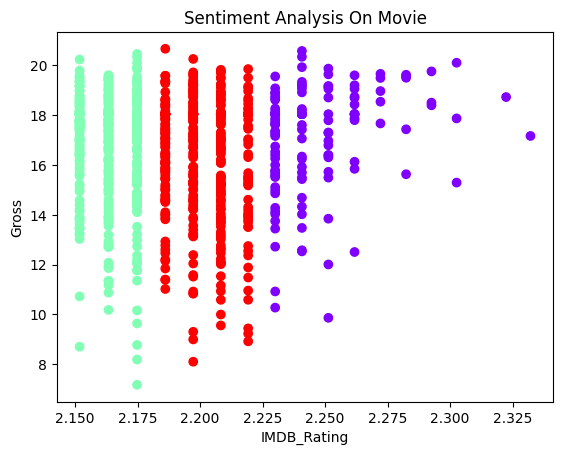

In [73]:
plt.scatter(df["IMDB_Rating"],df['Gross'],c= df['cluster'],cmap = 'rainbow')
plt.title("Sentiment Analysis On Movie")
plt.xlabel("IMDB_Rating")
plt.ylabel("Gross")

In [48]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'cluster'],
      dtype='object')